In [43]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_campaign_desc=pd.read_csv('./data/campaign_desc.csv')
df_campaign_table=pd.read_csv('./data/campaign_table.csv')
df_causal_data=pd.read_csv('./data/causal_data.csv')
df_coupon_redempt=pd.read_csv('./data/coupon_redempt.csv')
df_coupon=pd.read_csv('./data/coupon.csv')
df_hh_demographic=pd.read_csv('./data/hh_demographic.csv')
df_product=pd.read_csv('./data/product.csv')
df_transaction_data=pd.read_csv('./data/transaction_data.csv')

In [3]:
df_campaign_desc.head(3)

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
0,TypeB,24,659,719
1,TypeC,15,547,708
2,TypeB,25,659,691


In [4]:
np.sort(df_campaign_desc["CAMPAIGN"].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [5]:
df_campaign_table.head(3)

,DESCRIPTION,household_key,CAMPAIGN
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26


In [6]:
np.sort(df_campaign_table["CAMPAIGN"].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [7]:
df_coupon_redempt.head(3)

,household_key,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8


In [8]:
np.sort(df_coupon_redempt["CAMPAIGN"].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [9]:
df_merged=pd.merge(df_campaign_table,df_campaign_desc,how="inner",on="CAMPAIGN")

In [10]:
df_merged.drop('DESCRIPTION_y', axis=1, inplace=True)
df_merged.rename(columns={'DESCRIPTION_x':'description'},inplace=True)
df_merged

,description,household_key,CAMPAIGN,START_DAY,END_DAY
0,TypeA,17,26,224,264
1,TypeA,27,26,224,264
2,TypeA,212,26,224,264
3,TypeA,208,26,224,264
4,TypeA,192,26,224,264
...,...,...,...,...,...
7203,TypeC,1803,15,547,708
7204,TypeC,1082,15,547,708
7205,TypeC,942,15,547,708
7206,TypeC,855,15,547,708


In [11]:
df_merged=pd.merge(df_merged,df_coupon_redempt,how='inner',on=['household_key','CAMPAIGN'])
df_merged

,description,household_key,CAMPAIGN,START_DAY,END_DAY,DAY,COUPON_UPC
0,TypeA,2443,26,224,264,228,57457010076
1,TypeA,2305,26,224,264,237,57143030076
2,TypeA,2305,26,224,264,237,57756765876
3,TypeA,2305,26,224,264,260,54900020032
4,TypeA,2280,26,224,264,225,57008510075
...,...,...,...,...,...,...,...
2313,TypeC,256,20,615,685,638,54589399275
2314,TypeC,19,20,615,685,684,54100027032
2315,TypeC,1917,6,393,425,396,53663271277
2316,TypeC,1017,15,547,708,575,55000035213


In [12]:
df_merged['COUPON_UPC'].isna().sum()

0

Now let's combined this merged table with household demographics table. But let's take a look at the table first.

In [13]:
df_hh_demographic.head(3)

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8


In [14]:
len(df_hh_demographic['household_key'].unique())

801

Which mean there are 801 unique households in this data set.

In [15]:
df_merged=pd.merge(df_merged, df_hh_demographic, how='inner', on='household_key')

In [16]:
df_merged

,description,household_key,CAMPAIGN,START_DAY,END_DAY,DAY,COUPON_UPC,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC
0,TypeA,2305,26,224,264,237,57143030076,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown
1,TypeA,2305,26,224,264,237,57756765876,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown
2,TypeA,2305,26,224,264,260,54900020032,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown
3,TypeA,2305,30,323,369,348,53010030033,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown
4,TypeA,2305,13,504,551,510,10000085426,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851,TypeC,560,14,531,596,554,51111124078,19-24,U,35-49K,Unknown,2 Adults No Kids,2,None/Unknown
1852,TypeC,560,14,531,596,585,53620010028,19-24,U,35-49K,Unknown,2 Adults No Kids,2,None/Unknown
1853,TypeC,560,14,531,596,585,54800140060,19-24,U,35-49K,Unknown,2 Adults No Kids,2,None/Unknown
1854,TypeC,19,20,615,685,684,54100027032,35-44,B,15-24K,Unknown,Single Female,1,None/Unknown


At this point it'd be interesting to see how many households recieved each campaign:

In [17]:
df_merged['CAMPAIGN'].value_counts()

18    543
13    510
8     276
26     61
23     54
25     51
30     48
22     46
16     38
9      33
17     30
14     27
20     27
19     20
12     19
10     14
29     12
24      9
11      7
4       7
5       7
2       5
7       4
3       2
21      2
28      1
6       1
27      1
15      1
Name: CAMPAIGN, dtype: int64

The data across campaigns is very imbalanced. While we have data on 543 households receiving campaign 18, there are four campaigns that have data from only 1 household. Next, we focus on joining df_coupons to the merged table. This will give us Product ID, which is necessary to combine data from the remaining tables.

In [18]:
df_coupon[["COUPON_UPC","CAMPAIGN"]].value_counts()  #["COUPON_UPC"].value_counts()

COUPON_UPC   CAMPAIGN
10000085478  18          14477
10000085428  13          14367
10000085427  13           5717
10000085477  18           5686
10000085479  18           5474
                         ...  
10000089010  8               1
54650032278  30              1
10000089016  8               1
54589353178  3               1
57171010032  30              1
Length: 1397, dtype: int64

In [19]:
df_merged=pd.merge(df_merged,df_coupon,how='left',on=['CAMPAIGN','COUPON_UPC'])

In [20]:
df_merged

,description,household_key,CAMPAIGN,START_DAY,END_DAY,DAY,COUPON_UPC,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,PRODUCT_ID
0,TypeA,2305,26,224,264,237,57143030076,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,938300
1,TypeA,2305,26,224,264,237,57143030076,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,1699081
2,TypeA,2305,26,224,264,237,57143030076,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,1805288
3,TypeA,2305,26,224,264,237,57143030076,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,100282
4,TypeA,2305,26,224,264,237,57143030076,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,859427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1785434,TypeC,1820,15,547,708,555,55000035576,45-54,A,150-174K,Homeowner,2 Adults No Kids,2,None/Unknown,15715968
1785435,TypeC,1820,15,547,708,555,55000035576,45-54,A,150-174K,Homeowner,2 Adults No Kids,2,None/Unknown,15715969
1785436,TypeC,1820,15,547,708,555,55000035576,45-54,A,150-174K,Homeowner,2 Adults No Kids,2,None/Unknown,15716072
1785437,TypeC,1820,15,547,708,555,55000035576,45-54,A,150-174K,Homeowner,2 Adults No Kids,2,None/Unknown,15716098


In [21]:
df_product

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ
...,...,...,...,...,...,...,...
92348,18293142,6384,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,
92349,18293439,6393,DRUG GM,National,BOOKSTORE,CHILDRENS LOW END,
92350,18293696,6406,DRUG GM,National,BOOKSTORE,PAPERBACK BEST SELLER,
92351,18294080,6442,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,


In [22]:
df_merged=pd.merge(df_merged,df_product,how='inner',on='PRODUCT_ID')

In [23]:
df_merged

,description,household_key,CAMPAIGN,START_DAY,END_DAY,DAY,COUPON_UPC,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,...,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,TypeA,2305,26,224,264,237,57143030076,45-54,B,50-74K,...,Single Female,1,None/Unknown,938300,1646,PRODUCE,National,SALAD MIX,BLENDS,10 OZ
1,TypeA,2305,18,587,642,599,10000085475,45-54,B,50-74K,...,Single Female,1,None/Unknown,938300,1646,PRODUCE,National,SALAD MIX,BLENDS,10 OZ
2,TypeA,979,13,504,551,506,10000085425,35-44,B,35-49K,...,1 Adult Kids,2,1,938300,1646,PRODUCE,National,SALAD MIX,BLENDS,10 OZ
3,TypeA,979,18,587,642,606,57143020076,35-44,B,35-49K,...,1 Adult Kids,2,1,938300,1646,PRODUCE,National,SALAD MIX,BLENDS,10 OZ
4,TypeA,889,18,587,642,600,10000085475,25-34,A,50-74K,...,2 Adults Kids,4,2,938300,1646,PRODUCE,National,SALAD MIX,BLENDS,10 OZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1785434,TypeB,1802,21,624,656,654,57027722976,45-54,U,150-174K,...,2 Adults No Kids,2,None/Unknown,14110967,1459,DELI,National,CHEESES,CHEESE:SPECIALTY PREPACK,5 OZ
1785435,TypeB,1367,23,646,684,656,55420811176,35-44,U,75-99K,...,2 Adults Kids,3,1,8118584,6251,GROCERY,National,SHORTENING/OIL,COOKING OIL: PEANUT SAFFLOWER,20 OZ
1785436,TypeB,1367,23,646,684,656,55420811176,35-44,U,75-99K,...,2 Adults Kids,3,1,8124141,6251,GROCERY,National,SHORTENING/OIL,COOKING OIL: PEANUT SAFFLOWER,20 OZ
1785437,TypeB,1804,25,659,691,668,52100000076,65+,A,35-49K,...,2 Adults No Kids,2,None/Unknown,1126918,1075,GROCERY,National,CRACKERS/MISC BKD FD,BUTTER SPRAY CRACKER (RITZ/CLU,16 OZ


In [24]:
#df_merged=pd.merge(df_merged,df_causal_data,how='inner',on='PRODUCT_ID')

In [25]:
#df_merged=pd.merge(df_merged,df_transaction_data,how='inner',on='PRODUCT_ID')

In [26]:
df_merged.columns

Index(['description', 'household_key', 'CAMPAIGN', 'START_DAY', 'END_DAY',
       'DAY', 'COUPON_UPC', 'AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC',
       'HOMEOWNER_DESC', 'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC',
       'KID_CATEGORY_DESC', 'PRODUCT_ID', 'MANUFACTURER', 'DEPARTMENT',
       'BRAND', 'COMMODITY_DESC', 'SUB_COMMODITY_DESC',
       'CURR_SIZE_OF_PRODUCT'],
      dtype='object')

In [27]:
sys.getsizeof(df_merged)/1000000

1627.951711

In [28]:
df_transaction_data.columns

Index(['household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_DISC', 'COUPON_MATCH_DISC'],
      dtype='object')

In [29]:
df_transaction_data.drop(['DAY','BASKET_ID', 'WEEK_NO'], axis=1, inplace=True)

In [30]:
df_merged=pd.merge(df_transaction_data,df_merged,how='inner',on=['household_key','PRODUCT_ID'])

In [31]:
df_merged

,household_key,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,description,...,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2305,873203,1,1.67,414,-1.02,1300,0.0,0.0,TypeA,...,Homeowner,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ
1,2305,873203,1,1.79,414,-0.90,1220,0.0,0.0,TypeA,...,Homeowner,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ
2,2305,873203,1,1.89,414,0.00,1111,0.0,0.0,TypeA,...,Homeowner,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ
3,2305,873203,1,1.67,414,-0.22,1341,0.0,0.0,TypeA,...,Homeowner,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ
4,2305,873203,1,1.67,414,-0.22,1243,0.0,0.0,TypeA,...,Homeowner,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112017,1146,9858843,1,2.50,304,-0.19,1456,0.0,0.0,TypeA,...,Homeowner,1 Adult Kids,4,3+,135,GROCERY,National,FRZN POTATOES,FRZN FRENCH FRIES,26 OZ
112018,1823,1130763,2,3.70,402,0.00,1334,0.0,0.0,TypeA,...,Homeowner,2 Adults No Kids,2,None/Unknown,1251,GROCERY,National,SOUP,RTS SOUP: CHUNKY/HOMESTYLE ET,18.8 OZ
112019,1823,9885380,1,5.49,402,0.00,1334,0.0,0.0,TypeA,...,Homeowner,2 Adults No Kids,2,None/Unknown,26,DRUG GM,National,DIETARY AID PRODUCTS,DIET CNTRL LIQS NUTRITIONAL,
112020,1823,15927110,1,5.59,402,0.00,1334,0.0,0.0,TypeA,...,Homeowner,2 Adults No Kids,2,None/Unknown,26,DRUG GM,National,DIETARY AID PRODUCTS,DIET CNTRL LIQS NUTRITIONAL,


In [33]:
df_merged.to_csv('./data/all_tables_combined.csv',index=0)

In [36]:
df_merged

,household_key,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,description,...,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2305,873203,1,1.67,414,-1.02,1300,0.0,0.0,TypeA,...,Homeowner,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ
1,2305,873203,1,1.79,414,-0.90,1220,0.0,0.0,TypeA,...,Homeowner,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ
2,2305,873203,1,1.89,414,0.00,1111,0.0,0.0,TypeA,...,Homeowner,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ
3,2305,873203,1,1.67,414,-0.22,1341,0.0,0.0,TypeA,...,Homeowner,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ
4,2305,873203,1,1.67,414,-0.22,1243,0.0,0.0,TypeA,...,Homeowner,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112017,1146,9858843,1,2.50,304,-0.19,1456,0.0,0.0,TypeA,...,Homeowner,1 Adult Kids,4,3+,135,GROCERY,National,FRZN POTATOES,FRZN FRENCH FRIES,26 OZ
112018,1823,1130763,2,3.70,402,0.00,1334,0.0,0.0,TypeA,...,Homeowner,2 Adults No Kids,2,None/Unknown,1251,GROCERY,National,SOUP,RTS SOUP: CHUNKY/HOMESTYLE ET,18.8 OZ
112019,1823,9885380,1,5.49,402,0.00,1334,0.0,0.0,TypeA,...,Homeowner,2 Adults No Kids,2,None/Unknown,26,DRUG GM,National,DIETARY AID PRODUCTS,DIET CNTRL LIQS NUTRITIONAL,
112020,1823,15927110,1,5.59,402,0.00,1334,0.0,0.0,TypeA,...,Homeowner,2 Adults No Kids,2,None/Unknown,26,DRUG GM,National,DIETARY AID PRODUCTS,DIET CNTRL LIQS NUTRITIONAL,


In [53]:
df_merged['retail_disc/sales_value']=df_merged['RETAIL_DISC']/df_merged['SALES_VALUE']
df_merged['coupon_disc/sales_value']=df_merged['COUPON_DISC']/df_merged['SALES_VALUE']

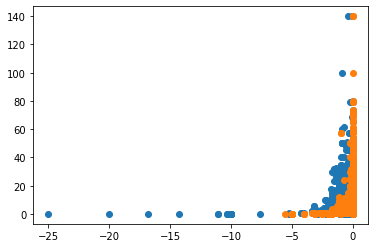

In [55]:
df_merged.sort_values(by='retail_disc/sales_value')
plt.scatter(x=df_merged['retail_disc/sales_value'],y=df_merged['SALES_VALUE'])
df_merged.sort_values(by='coupon_disc/sales_value')
plt.scatter(x=df_merged['coupon_disc/sales_value'],y=df_merged['SALES_VALUE'])